In [1]:
import numpy as np
import pandas as pd


# pandas 中的基本结构
1. Series：一维数组，与Numpy中的一维数组类似，但是Series能保存索引，索引默认从0开始，也可以自定义索引。
2. DataFrame：二维数组，可以看作是由多个Series组成的字典，每个Series的索引都相同，DataFrame的索引默认从0开始，也可以自定义索引。
3. Panel：三维数组，可以看作是由多个DataFrame组成的字典，每个DataFrame的索引都相同，Panel的索引默认从0开始，也可以自定义索引。

# pandas 中的基本操作


In [2]:
# Object creation
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range("20130101", periods=6)#生成一个日期范围，period代表长度
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD")) #生成一个6行4列的DataFrame，数据为随机数，索引为dates，列名为ABCD
df
# 索引也就是每行名字index，列名也就是columns

,A,B,C,D
2013-01-01,-0.755211,-0.101649,-0.480073,-0.434399
2013-01-02,-1.222124,-0.247170,-1.457941,0.182426
2013-01-03,-0.945402,0.351848,0.691572,0.727732
2013-01-04,-1.012584,-0.204607,-1.875478,0.519386
2013-01-05,0.855156,-0.400730,0.083961,-0.599275
2013-01-06,0.391294,0.055594,-1.307525,1.175993


In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [7]:
# Viewing data
print(df.head(3)) #查看前3行
print(df.tail(3)) #查看后3行
print(df.index) #查看索引
print(df.columns) #查看列名
print(df.values)#查看数据
print(df.describe()) #查看数据的基本统计信息，以每一列为统计单位



                   A         B         C         D
2013-01-01 -0.755211 -0.101649 -0.480073 -0.434399
2013-01-02 -1.222124 -0.247170 -1.457941  0.182426
2013-01-03 -0.945402  0.351848  0.691572  0.727732
                   A         B         C         D
2013-01-04 -1.012584 -0.204607 -1.875478  0.519386
2013-01-05  0.855156 -0.400730  0.083961 -0.599275
2013-01-06  0.391294  0.055594 -1.307525  1.175993
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[-0.75521115 -0.10164857 -0.48007287 -0.43439941]
 [-1.22212427 -0.24716981 -1.4579414   0.18242599]
 [-0.94540154  0.35184792  0.69157214  0.72773157]
 [-1.01258404 -0.20460697 -1.87547779  0.51938554]
 [ 0.85515637 -0.40073018  0.08396085 -0.59927537]
 [ 0.39129442  0.05559397 -1.30752484  1.17599316]]
              A         B         C         D
count  6.000000  6.000000  6.000

In [8]:
print(df.T) #转置
print(df.sort_index(axis=1, ascending=False)) #按列名排序
print(df.sort_values(by="B")) #按列B的值排序

   2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.755211   -1.222124   -0.945402   -1.012584    0.855156    0.391294
B   -0.101649   -0.247170    0.351848   -0.204607   -0.400730    0.055594
C   -0.480073   -1.457941    0.691572   -1.875478    0.083961   -1.307525
D   -0.434399    0.182426    0.727732    0.519386   -0.599275    1.175993
                   D         C         B         A
2013-01-01 -0.434399 -0.480073 -0.101649 -0.755211
2013-01-02  0.182426 -1.457941 -0.247170 -1.222124
2013-01-03  0.727732  0.691572  0.351848 -0.945402
2013-01-04  0.519386 -1.875478 -0.204607 -1.012584
2013-01-05 -0.599275  0.083961 -0.400730  0.855156
2013-01-06  1.175993 -1.307525  0.055594  0.391294
                   A         B         C         D
2013-01-05  0.855156 -0.400730  0.083961 -0.599275
2013-01-02 -1.222124 -0.247170 -1.457941  0.182426
2013-01-04 -1.012584 -0.204607 -1.875478  0.519386
2013-01-01 -0.755211 -0.101649 -0.480073 -0.434399
2013-01-06  0.3912

In [9]:
# Selection
print(df["A"]) #选择列A
print(df[0:3]) #选择前3行
print(df["20130102":"20130104"]) #选择日期范围内的行


2013-01-01   -0.755211
2013-01-02   -1.222124
2013-01-03   -0.945402
2013-01-04   -1.012584
2013-01-05    0.855156
2013-01-06    0.391294
Freq: D, Name: A, dtype: float64
                   A         B         C         D
2013-01-01 -0.755211 -0.101649 -0.480073 -0.434399
2013-01-02 -1.222124 -0.247170 -1.457941  0.182426
2013-01-03 -0.945402  0.351848  0.691572  0.727732
                   A         B         C         D
2013-01-02 -1.222124 -0.247170 -1.457941  0.182426
2013-01-03 -0.945402  0.351848  0.691572  0.727732
2013-01-04 -1.012584 -0.204607 -1.875478  0.519386


In [10]:
print(df.loc[dates[0]]) #选择日期为dates[0]的行，选出的数据带column名，以及数据名
print("\n")
print(df.loc[:, "A"]) #选择列A的所有行
print("\n")
print(df.loc[dates[0], "A"]) #选择日期为dates[0]的行和列A
print("\n")
print(df.loc[dates[0], ["A", "B"]]) #选择日期为dates[0]的行和列A和B，如果带两个列的话就会显示列名

print

A   -0.755211
B   -0.101649
C   -0.480073
D   -0.434399
Name: 2013-01-01 00:00:00, dtype: float64


2013-01-01   -0.755211
2013-01-02   -1.222124
2013-01-03   -0.945402
2013-01-04   -1.012584
2013-01-05    0.855156
2013-01-06    0.391294
Freq: D, Name: A, dtype: float64


-0.7552111493847157


A   -0.755211
B   -0.101649
Name: 2013-01-01 00:00:00, dtype: float64


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [11]:
df.loc[dates[1], ["A","B"]] #选择列A
df[0:3]# 选择前3行

,A,B,C,D
2013-01-01,-0.755211,-0.101649,-0.480073,-0.434399
2013-01-02,-1.222124,-0.247170,-1.457941,0.182426
2013-01-03,-0.945402,0.351848,0.691572,0.727732


In [12]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-1.222124,-0.247170,-1.457941,0.182426
2013-01-03,-0.945402,0.351848,0.691572,0.727732
2013-01-04,-1.012584,-0.204607,-1.875478,0.519386


In [13]:
# boolean indexing  带有判断的选择
df[df.A > 0] #选择列A大于0的行


,A,B,C,D
2013-01-05,0.855156,-0.400730,0.083961,-0.599275
2013-01-06,0.391294,0.055594,-1.307525,1.175993


In [14]:
df[df > 0] #选择所有大于0的行


,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,0.182426
2013-01-03,NaN,0.351848,0.691572,0.727732
2013-01-04,NaN,NaN,NaN,0.519386
2013-01-05,0.855156,NaN,0.083961,NaN
2013-01-06,0.391294,0.055594,NaN,1.175993


In [15]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.755211,-0.101649,-0.480073,-0.434399,one
2013-01-02,-1.222124,-0.247170,-1.457941,0.182426,one
2013-01-03,-0.945402,0.351848,0.691572,0.727732,two
2013-01-04,-1.012584,-0.204607,-1.875478,0.519386,three
2013-01-05,0.855156,-0.400730,0.083961,-0.599275,four
2013-01-06,0.391294,0.055594,-1.307525,1.175993,three


In [16]:
df2[df2["E"].isin(["two", "four"])] # 通过新加一个列进行数据的标注，然后进行选择

,A,B,C,D,E
2013-01-03,-0.945402,0.351848,0.691572,0.727732,two
2013-01-05,0.855156,-0.400730,0.083961,-0.599275,four


# Setting a new column automatically aligns the data by the indexes:

In [17]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1
df["F"] = s1

In [18]:
df.at[dates[0], "A"] = 0 # 这里把dates第一个行以及A列交叉的数据位设置成0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.101649,-0.480073,-0.434399,NaN
2013-01-02,-1.222124,-0.247170,-1.457941,0.182426,1.0
2013-01-03,-0.945402,0.351848,0.691572,0.727732,2.0
2013-01-04,-1.012584,-0.204607,-1.875478,0.519386,3.0
2013-01-05,0.855156,-0.400730,0.083961,-0.599275,4.0
2013-01-06,0.391294,0.055594,-1.307525,1.175993,5.0


In [19]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.480073,-0.434399,NaN
2013-01-02,-1.222124,-0.247170,-1.457941,0.182426,1.0
2013-01-03,-0.945402,0.351848,0.691572,0.727732,2.0
2013-01-04,-1.012584,-0.204607,-1.875478,0.519386,3.0
2013-01-05,0.855156,-0.400730,0.083961,-0.599275,4.0
2013-01-06,0.391294,0.055594,-1.307525,1.175993,5.0


In [20]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.480073,5.0,NaN
2013-01-02,-1.222124,-0.247170,-1.457941,5.0,1.0
2013-01-03,-0.945402,0.351848,0.691572,5.0,2.0
2013-01-04,-1.012584,-0.204607,-1.875478,5.0,3.0
2013-01-05,0.855156,-0.400730,0.083961,5.0,4.0
2013-01-06,0.391294,0.055594,-1.307525,5.0,5.0


In [21]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.480073,-5.0,NaN
2013-01-02,-1.222124,-0.247170,-1.457941,-5.0,-1.0
2013-01-03,-0.945402,-0.351848,-0.691572,-5.0,-2.0
2013-01-04,-1.012584,-0.204607,-1.875478,-5.0,-3.0
2013-01-05,-0.855156,-0.400730,-0.083961,-5.0,-4.0
2013-01-06,-0.391294,-0.055594,-1.307525,-5.0,-5.0


# Missing data


In [22]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"]) # E列没有赋值，空列表里面全部是NaN

df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.480073,5.0,NaN,1.0
2013-01-02,-1.222124,-0.247170,-1.457941,5.0,1.0,1.0
2013-01-03,-0.945402,0.351848,0.691572,5.0,2.0,NaN
2013-01-04,-1.012584,-0.204607,-1.875478,5.0,3.0,NaN


In [23]:
df1.dropna(how="any") # 直接把有nan的值抛弃掉

,A,B,C,D,F,E
2013-01-02,-1.222124,-0.24717,-1.457941,5.0,1.0,1.0


In [24]:
df1.fillna(value=5) # 将nan替换

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.480073,5.0,5.0,1.0
2013-01-02,-1.222124,-0.247170,-1.457941,5.0,1.0,1.0
2013-01-03,-0.945402,0.351848,0.691572,5.0,2.0,5.0
2013-01-04,-1.012584,-0.204607,-1.875478,5.0,3.0,5.0


In [25]:
pd.isna(df1) # 变成boolean值，nan为True，非nan为False

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Stats统计


In [26]:
df.mean() # 每一列的平均值

A   -0.322277
B   -0.074178
C   -0.724247
D    5.000000
F    3.000000
dtype: float64

In [27]:
df.mean(axis=1) # 指名对行求平均

2013-01-01    1.129982
2013-01-02    0.614553
2013-01-03    1.419604
2013-01-04    0.981466
2013-01-05    1.907677
2013-01-06    1.827873
Freq: D, dtype: float64

In [28]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s
# 这里相当于是将前面的数列向后移动两位，空出来的位置用nan填充，对其生成的日期

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [29]:
df.sub(s, axis="index") # 对df的每一列进行减去s的操作，axis=index表示对每一列进行操作

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.945402,-0.648152,-0.308428,4.0,1.0
2013-01-04,-4.012584,-3.204607,-4.875478,2.0,0.0
2013-01-05,-4.144844,-5.400730,-4.916039,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [30]:
df.agg(lambda x: np.mean(x) * 5.6) # 对每一列的平均值进行×5.6的操作

A    -1.804748
B    -0.415394
C    -4.055785
D    28.000000
F    16.800000
dtype: float64

In [31]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-48.583374,506.0,NaN
2013-01-02,-123.678976,-25.013585,-147.543670,506.0,101.2
2013-01-03,-95.674636,35.607009,69.987100,506.0,202.4
2013-01-04,-102.473504,-20.706226,-189.798353,506.0,303.6
2013-01-05,86.541825,-40.553894,8.496838,506.0,404.8
2013-01-06,39.598995,5.626109,-132.321514,506.0,506.0


In [32]:
s = pd.Series(np.random.randint(0, 7, size=10)) # 随机0到7的整数，长度为10
s

0    0
1    1
2    1
3    1
4    1
5    2
6    4
7    3
8    3
9    3
dtype: int32

In [33]:
s.value_counts() # 数出现数字的个数

1    4
3    3
0    1
2    1
4    1
Name: count, dtype: int64

# String methods

In [34]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge


In [35]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.482038,0.340862,0.777069,-0.078357
1,0.196735,0.953269,-0.358977,1.083038
2,0.307729,0.640857,-1.158020,1.567597
3,1.007532,-0.508654,-0.946260,-1.115336
4,-0.749993,0.314025,0.401205,1.131263
5,0.110559,0.498521,-0.033465,0.504910
6,1.560140,-0.762145,1.441221,-0.400282
7,0.200067,-0.723073,-0.072381,2.387477
8,-0.473922,2.696308,-0.215945,0.877552
9,1.788028,2.027440,-0.481015,-0.733841


In [36]:
pieces = [df[:3], df[3:7], df[7:]] # 将原数列划分为三个区域，每个部分的索引在df内部
pieces


[          0         1         2         3
 0  0.482038  0.340862  0.777069 -0.078357
 1  0.196735  0.953269 -0.358977  1.083038
 2  0.307729  0.640857 -1.158020  1.567597,
           0         1         2         3
 3  1.007532 -0.508654 -0.946260 -1.115336
 4 -0.749993  0.314025  0.401205  1.131263
 5  0.110559  0.498521 -0.033465  0.504910
 6  1.560140 -0.762145  1.441221 -0.400282,
           0         1         2         3
 7  0.200067 -0.723073 -0.072381  2.387477
 8 -0.473922  2.696308 -0.215945  0.877552
 9  1.788028  2.027440 -0.481015 -0.733841]

In [37]:
pd.concat(pieces)

,0,1,2,3
0,0.482038,0.340862,0.777069,-0.078357
1,0.196735,0.953269,-0.358977,1.083038
2,0.307729,0.640857,-1.158020,1.567597
3,1.007532,-0.508654,-0.946260,-1.115336
4,-0.749993,0.314025,0.401205,1.131263
5,0.110559,0.498521,-0.033465,0.504910
6,1.560140,-0.762145,1.441221,-0.400282
7,0.200067,-0.723073,-0.072381,2.387477
8,-0.473922,2.696308,-0.215945,0.877552
9,1.788028,2.027440,-0.481015,-0.733841


# Join
使用merge方法

In [38]:
left = pd.DataFrame({"key": ["foo1", "foo2"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo2", "foo1"], "rval": [4, 5]})
left
right
pd.merge(left, right, on="key")# key为连接的列



,key,lval,rval
0,foo1,1,5
1,foo2,2,4


# Grouping

In [39]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.210911,-0.710168
1,bar,one,-0.586882,0.860852
2,foo,two,1.277984,0.571398
3,bar,three,1.326966,-0.237798
4,foo,two,1.066493,-0.158629
5,bar,two,-0.470197,-0.642680
6,foo,one,-2.952403,0.918327
7,foo,three,-0.248183,-0.273056


In [40]:
df.groupby("A")[["C", "D"]].sum() # 首先跟据A列进行分组，相同名字的归为同一类，然后对C和D列进行求和，对于每一类进行求和

,C,D
A,,
bar,0.269887,-0.019625
foo,-0.645198,0.347872


In [41]:
df.groupby(["A", "B"]).sum() # groupby内部两个约束条件


C         D
A   B                        
bar one   -0.586882  0.860852
    three  1.326966 -0.237798
    two   -0.470197 -0.642680
foo one   -2.741492  0.208159
    three -0.248183 -0.273056
    two    2.344477  0.412769

# reshaping
## stack

In [42]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df

A         B
first second                    
bar   one     0.252567  1.431170
      two    -0.205620  0.324083
baz   one     1.925428  0.419625
      two     0.853947  0.683458
foo   one    -1.166864 -0.726325
      two     0.591451  0.743431
qux   one    -1.455640 -1.271767
      two    -1.211464  0.651238

In [43]:
df2 = df[:4]

df2

A         B
first second                    
bar   one     0.252567  1.431170
      two    -0.205620  0.324083
baz   one     1.925428  0.419625
      two     0.853947  0.683458

In [44]:
stacked = df2.stack(future_stack=True) # 方便二分法查找，将列变成行


stacked

first  second   
bar    one     A    0.252567
               B    1.431170
       two     A   -0.205620
               B    0.324083
baz    one     A    1.925428
               B    0.419625
       two     A    0.853947
               B    0.683458
dtype: float64

In [45]:
stacked.unstack() # 逆操作，默认括号内为最大数

A         B
first second                    
bar   one     0.252567  1.431170
      two    -0.205620  0.324083
baz   one     1.925428  0.419625
      two     0.853947  0.683458

In [46]:
stacked.unstack(1) # 以第1号位的属性作为列

second        one       two
first                      
bar   A  0.252567 -0.205620
      B  1.431170  0.324083
baz   A  1.925428  0.853947
      B  0.419625  0.683458

In [47]:
stacked.unstack(0) # 以第0号位的属性作为列

first          bar       baz
second                      
one    A  0.252567  1.925428
       B  1.431170  0.419625
two    A -0.205620  0.853947
       B  0.324083  0.683458

# Pivot tables

In [48]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df


,A,B,C,D,E
0,one,A,foo,1.364321,-1.781887
1,one,B,foo,0.255591,0.087062
2,two,C,foo,-0.574052,-1.215471
3,three,A,bar,1.482521,-0.791771
4,one,B,bar,0.933130,0.184664
5,one,C,bar,1.249760,-0.987237
6,two,A,foo,-2.052297,0.037318
7,three,B,foo,-1.169091,-0.028807
8,one,C,foo,0.031817,-1.731253
9,one,A,bar,-0.818639,-1.395497


In [49]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.818639  1.364321
      B  0.933130  0.255591
      C  1.249760  0.031817
three A  1.482521       NaN
      B       NaN -1.169091
      C -0.574619       NaN
two   A       NaN -2.052297
      B -0.451827       NaN
      C       NaN -0.574052

# Time Series Section

在 Pandas 中，时间序列（Time Series）处理功能非常强大，尤其是用于重采样操作时。重采样是指在数据的频率转换过程中，对数据进行重新采样和聚合。例如，将每秒的数据转换为每5分钟的数据。这在金融等领域非常常见。

在 Pandas 中，时间序列的重采样操作主要通过 .resample() 方法实现。它允许你基于时间间隔（如‘5T’代表5分钟）对数据进行重新采样，并且可以通过聚合方法（如求和、平均值等）处理新的数据点。具体操作流程如下：

设定时间索引：首先，时间序列数据通常需要以时间作为索引（index），这让 Pandas 能够基于时间间隔对数据进行重采样。
重采样操作：使用 .resample() 方法指定新的时间频率。常见频率包括秒（'S'）、分钟（'T'）、小时（'H'）、天（'D'）等。
聚合方法：重采样后，Pandas 允许你对新的时间间隔内的数据点进行聚合操作，例如求平均值 .mean()，求和 .sum()，或获取最大值 .max() 等。

In [50]:
import pandas as pd
import numpy as np

# 创建一个示例时间序列数据，每秒一个数据点
date_range = pd.date_range('2023-01-01', periods=100, freq='S')
data = pd.Series(np.random.randn(100), index=date_range)

print(data)
# 将数据从每秒重采样为每5分钟
resampled_data = data.resample('5Min').mean() # 

print(resampled_data)

2023-01-01 00:00:00   -0.867320
2023-01-01 00:00:01   -1.601752
2023-01-01 00:00:02    1.122428
2023-01-01 00:00:03    1.541707
2023-01-01 00:00:04   -1.000776
                         ...   
2023-01-01 00:01:35    0.226769
2023-01-01 00:01:36   -0.177547
2023-01-01 00:01:37   -0.076747
2023-01-01 00:01:38    0.898542
2023-01-01 00:01:39    0.388706
Freq: S, Length: 100, dtype: float64
2023-01-01   -0.007557
Freq: 5T, dtype: float64


In [51]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -0.080116
2012-03-07   -0.690534
2012-03-08    0.324658
2012-03-09    0.263536
2012-03-10    0.549854
Freq: D, dtype: float64

In [52]:
ts_utc = ts.tz_localize("UTC")

ts_utc

2012-03-06 00:00:00+00:00   -0.080116
2012-03-07 00:00:00+00:00   -0.690534
2012-03-08 00:00:00+00:00    0.324658
2012-03-09 00:00:00+00:00    0.263536
2012-03-10 00:00:00+00:00    0.549854
Freq: D, dtype: float64

In [53]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.080116
2012-03-06 19:00:00-05:00   -0.690534
2012-03-07 19:00:00-05:00    0.324658
2012-03-08 19:00:00-05:00    0.263536
2012-03-09 19:00:00-05:00    0.549854
Freq: D, dtype: float64

In [54]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

# Bussiness Date Section
在原有的时间日期上加上工作日，默认跳过周末，如周五加两天工作日则延续到周二

In [55]:
import pandas as pd
from pandas.tseries.offsets import BusinessDay

# 创建一个示例时间序列数据
date_range = pd.date_range('2023-09-01', periods=5, freq='D')
data = pd.Series([10, 20, 30, 40, 50], index=date_range)

# 为每个日期加上 2 个工作日
business_days = 2 * BusinessDay()
new_dates = data.index + business_days

# 显示原始数据和新时间序列
print("原始时间序列：")
print(data)
print("\n新时间序列（添加了2个工作日）：")
data.index = new_dates
print(data)


原始时间序列：
2023-09-01    10
2023-09-02    20
2023-09-03    30
2023-09-04    40
2023-09-05    50
Freq: D, dtype: int64

新时间序列（添加了2个工作日）：
2023-09-05    10
2023-09-05    20
2023-09-05    30
2023-09-06    40
2023-09-07    50
dtype: int64


# Categoricals

In [56]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [57]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [58]:
new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)

# reorder the catagories so that they are in the new order
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [59]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [60]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting


<Axes: >

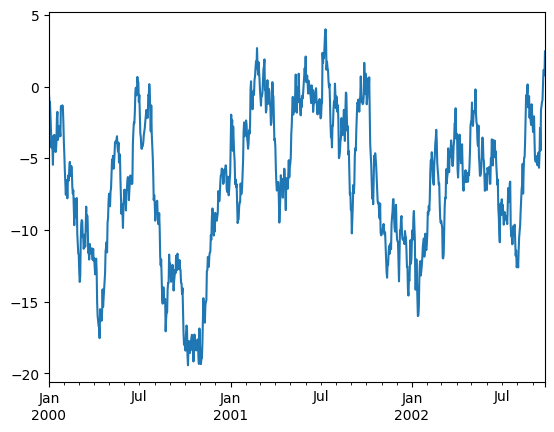

In [61]:
import matplotlib.pyplot as plt

plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

<Figure size 640x480 with 0 Axes>

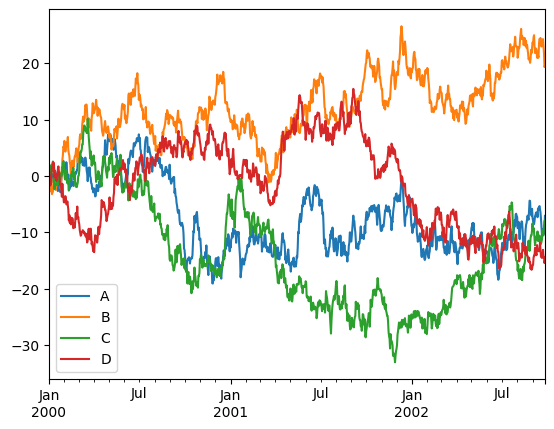

In [62]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');

# importing and exporting data

In [63]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))

df.to_csv("foo.csv")



In [64]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,1,0,2,4,3
1,1,2,4,2,3,4
2,2,1,0,4,1,0
3,3,3,0,0,3,2
4,4,4,4,4,4,1
5,5,3,3,1,2,3
6,6,4,0,2,1,2
7,7,4,1,0,3,0
8,8,0,2,4,4,0
9,9,4,4,0,2,3
